In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data = pd.read_csv("Customer Information.csv")

In [3]:
data.head().style.background_gradient(cmap = "YlGn")

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429000,12058,355060,0.000000,0.000000,0.000000,99.020000,13,C,Urban,1
1,41492,0.010000,21546,315150,0.000000,0.000000,0.000000,99.890000,21,A,Urban,1
2,31300,0.917000,17531,84140,2.000000,3.000000,1.000000,98.690000,7,C,Rural,0
3,19415,0.049000,15341,250510,0.000000,0.000000,0.000000,99.570000,9,A,Urban,1
4,99379,0.052000,31400,198680,0.000000,0.000000,0.000000,99.870000,12,B,Urban,1


In [4]:
data.shape

(79853, 12)

In [5]:
#Let's remove irrelevant columns
data = data.drop(["id"], axis = 1)
columns = data.columns

In [6]:
#Let's enocode columns
enoder = OrdinalEncoder()
data[["sourcing_channel", "residence_area_type"]] = enoder.fit_transform(data[["sourcing_channel", "residence_area_type"]])
data.columns = columns

In [7]:
#Let's treat missing values
data.isnull().sum()

perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

<AxesSubplot:>

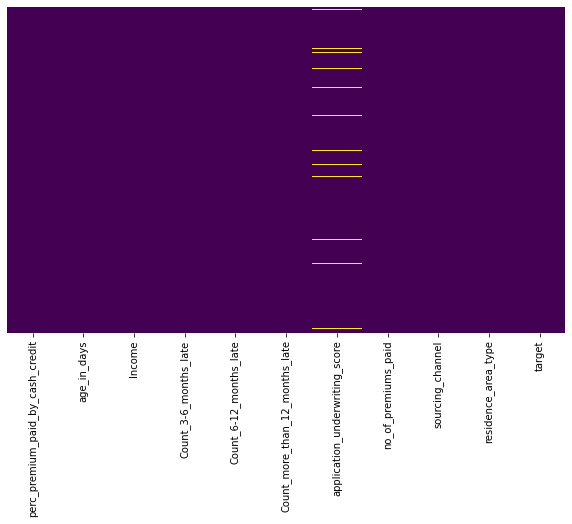

In [8]:
plt.figure(figsize = (10, 6))
sns.heatmap(data.isna(), cbar = False, cmap = "viridis", yticklabels = False)

In [9]:
imputer = SimpleImputer(strategy = "mean")
data = pd.DataFrame(imputer.fit_transform(data))
data.columns = columns

In [10]:
#Let's standardize the columns
target = data["target"]
data = data.drop("target", axis = 1)
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data))
data["target"] = target
data.columns = columns

In [11]:
#Let's make the model
x = data.drop("target", axis = 1)
y = data["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [12]:
performance = metrics.accuracy_score(y_test, predictions)
print(performance)

0.9382631018721432


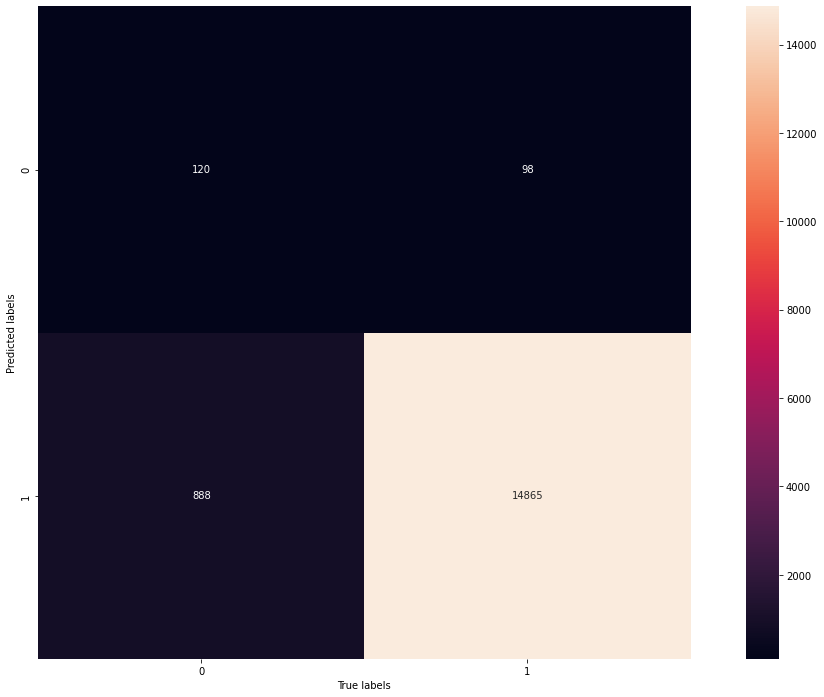

In [13]:
plt.figure(figsize = (20, 12))
mat = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("True labels")
plt.ylabel("Predicted labels")
plt.show()